In [16]:
from Bio import SeqIO
from tqdm import tqdm, tqdm_notebook

In [17]:
random_state = 4

sg_reads_seq = []
sg_reads_tax = []

for seq_record in SeqIO.parse('data/16S-SG-reads.fa/16S-reads.fa', "fasta"):
    sg_reads_seq.append(seq_record.seq)
    sg_reads_tax.append(seq_record.description[seq_record.description.find('description=')+12+1:-1].split())
    
len(sg_reads_seq), len(sg_reads_tax)

(28224, 28224)

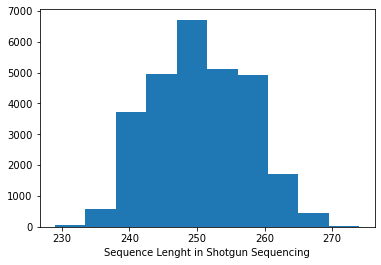

In [18]:
sg_lens = []
for i in sg_reads_seq:
    sg_lens.append(len(i))
    
from matplotlib import pyplot as plt

plt.hist(sg_lens)
plt.xlabel('Sequence Lenght in Shotgun Sequencing')
plt.show()

In [19]:
k = []
for i,j in enumerate(sg_reads_seq):
    #print(i, set(j))
    if len( set(j))>4:
        k.append(i)
print(k[:10])
print(len(k), '/', len(sg_reads_seq))

[23, 72, 80, 143, 168, 193, 230, 253, 272, 338]
1006 / 28224


In [20]:
indexes = k
for index in sorted(indexes, reverse=True):
    del sg_reads_seq[index]
    del sg_reads_tax[index]

In [21]:
k = []
for i,j in enumerate(sg_reads_seq):
    #print(i, set(j))
    if len( set(j))>4:
        k.append(i)
print(k[:10])
print(len(k), '/', len(sg_reads_seq))

[]
0 / 27218


In [22]:
import numpy as np
import pandas as pd

tax = ["Class", "Order", "Family", "Genus"]

sg = pd.DataFrame()

col = []
for j in sg_reads_tax:
    col.append(j[0])
sg[tax[0]] = col

#pd.get_dummies() always arrange the different categories in alphabetical order and then assign values
pd.get_dummies(sg)

,Class_Alphaproteobacteria,Class_Betaproteobacteria,Class_Gammaproteobacteria
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
27213,0,0,1
27214,0,0,1
27215,1,0,0
27216,1,0,0


In [23]:
classes = list(pd.get_dummies(sg).columns)
labels = np.argmax(np.array(pd.get_dummies(sg)), axis=1)
print(min([len(k) for k in sg_reads_seq]), max([len(k) for k in sg_reads_seq]))

labels, len(labels)


229 274


(array([2, 0, 2, ..., 0, 0, 2], dtype=int64), 27218)

In [ ]:
X = PyDNA.select_df_column(df_genomics, “dna_sequence”)
dna_is_same_length = PyDNA.dna_sequence_is_equal_length(X) 
print(dna_is_same_length)